Open the file using pydub

In [1]:
from pydub import AudioSegment
import numpy as np
#from scipy.io.wavfile import read
from scipy.fftpack import fft
import pydub

In [2]:
song = AudioSegment.from_file("input/audio.m4a",format='mp4')

In [18]:
song

In [3]:
song_arr=song.get_array_of_samples()

In [6]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

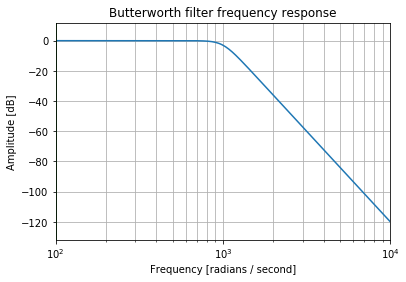

In [7]:
b, a = signal.butter(6, 1000, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
#plt.show()

In [8]:
from scipy.fftpack import fft
import numpy as np
import matplotlib.pyplot as plt


In [9]:
y=song_arr
Fm = len(y)+1
total_seconds = 3
x = np.arange(0,total_seconds-total_seconds/Fm,total_seconds/Fm)
f_osc = 1

In [10]:
len(x)

171968

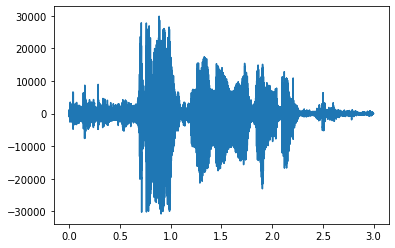

In [11]:
plt.plot(x,y)

/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/ipython/7.8.0/libexec/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


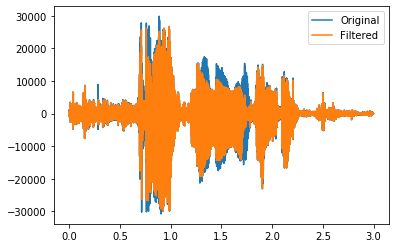

In [12]:
from scipy import signal

# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10,'low')

# Apply modeled filter to data
y_filtered_low = signal.filtfilt(b, a, y)

plt.plot(x,y)
plt.plot(x,y_filtered_low)
plt.legend(["Original","Filtered"])

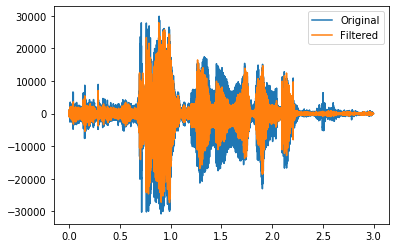

In [13]:
# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/100, 'high')

# Apply modeled filter to data
y_filtered_high = signal.filtfilt(b, a, y)

plt.plot(x,y)
plt.plot(x,y_filtered_high)
plt.legend(["Original","Filtered"])

In [14]:
import array
low_filter = array.array('h')
low_filter.fromlist(list(map(int,y_filtered_low)))
audio_low=song._spawn(data=low_filter)

In [15]:
audio_low

In [16]:
high_filter = array.array('h')
high_filter.fromlist(list(map(int,y_filtered_high)))
audio_high=song._spawn(data=high_filter)

In [17]:
audio_high

In [21]:
audio_high.export("./output/audio_high.ogg", format="ogg")
audio_low.export("./output/audio_low.ogg", format="ogg")

<_io.BufferedRandom name='./output/audio_low.ogg'>

In [53]:
from scipy.io.wavfile import read

def saveMonoNumpyAsMp3(a, Fm, filename="output.mp3"):
    """
    🙈
    """
    #mp3 only accepts 32 bits byte sequences
    a = a.astype("float32")
    
    audio_segment = pydub.AudioSegment(
        a.tobytes(), 
        frame_rate=Fm,
        sample_width=a.dtype.itemsize, 
        channels=1
    )
    audio_segment.export(filename, format="mp3")

In [54]:
saveMonoNumpyAsMp3(y,Fm=song.frame_rate)